### Project using API

Location, Curency

**Import Libraries**

In [13]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from pprint import pprint
from datetime import date, timedelta

In [3]:
url = "http://api.open-notify.org/iss-now.json"
responce = requests.get(url = url)
responce.status_code

200

In [4]:
data = responce.json()
data

{'message': 'success',
 'iss_position': {'latitude': '-2.4343', 'longitude': '9.3414'},
 'timestamp': 1755863984}

`.content`: gives the raw response body in bytes (not decoded yet).

In [5]:
responce.content

b'{"message": "success", "iss_position": {"latitude": "-2.4343", "longitude": "9.3414"}, "timestamp": 1755863984}'

`latitude longtitude`

In [9]:
data = responce.json()['iss_position']

lat = data['latitude'] # longtitude
lon = data['longitude']
print(f'Latitude: {lat}\nLongtitude: {lon}')

Latitude: -2.4343
Longtitude: 9.3414




---



In [11]:

url = "https://api.open-meteo.com/v1/forecast?latitude=41.31&longitude=69.28&hourly=temperature_2m"
responce = requests.get(url)
data = responce.json()
pprint(data)

{'elevation': 449.0,
 'generationtime_ms': 0.027894973754882812,
 'hourly': {'temperature_2m': [17.0,
                               16.9,
                               18.3,
                               22.6,
                               26.7,
                               29.9,
                               32.3,
                               34.2,
                               35.5,
                               36.2,
                               36.3,
                               36.1,
                               35.4,
                               34.2,
                               31.6,
                               28.9,
                               27.3,
                               25.9,
                               25.0,
                               24.6,
                               24.0,
                               22.9,
                               22.4,
                               22.0,
                               21.8,
          

In [12]:
hourly = pd.DataFrame(data['hourly'])
hourly

,time,temperature_2m
0,2025-08-22T00:00,17.0
1,2025-08-22T01:00,16.9
2,2025-08-22T02:00,18.3
3,2025-08-22T03:00,22.6
4,2025-08-22T04:00,26.7
...,...,...
163,2025-08-28T19:00,26.0
164,2025-08-28T20:00,23.3
165,2025-08-28T21:00,21.3
166,2025-08-28T22:00,20.1


In [17]:
# -----------------------------
# Cities (name -> lat, lon)
# -----------------------------

cities = {
    "Tashkent": (41.31, 69.28),
    "London": (51.5074, -0.1278),
    "New York": (40.7128, -74.0060),
    "Tokyo": (35.6762, 139.6503),
}

today = date.today()
start = (today - timedelta(days = 5)).strftime('%Y-%m-%d')
end = (today - timedelta(days = 1)).strftime('%Y-%m-%d')

print(f'Start: {start}\nEnd: {end}')

Start: 2025-08-17
End: 2025-08-21


In [18]:
cities.items()

dict_items([('Tashkent', (41.31, 69.28)), ('London', (51.5074, -0.1278)), ('New York', (40.7128, -74.006)), ('Tokyo', (35.6762, 139.6503))])



---



### Collect Data

In [20]:
frames = []


for city, (lat, lon) in cities.items():
  url = ("https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={lat}&longitude={lon}"
        f"&start_date={start}&end_date={end}"
        "&hourly=temperature_2m&timezone=auto")

  # print url
  responce = requests.get(url)
  data = responce.json()

  # create data frame
  df = pd.DataFrame(data['hourly'])
  df['time'] = pd.to_datetime(df['time'])
  df['city'] = city
  frames.append(df)

# joining df together
aldf = pd.concat(frames, ignore_index = True)
aldf

,time,temperature_2m,city
0,2025-08-17 00:00:00,24.3,Tashkent
1,2025-08-17 01:00:00,23.8,Tashkent
2,2025-08-17 02:00:00,22.9,Tashkent
3,2025-08-17 03:00:00,21.6,Tashkent
4,2025-08-17 04:00:00,21.0,Tashkent
...,...,...,...
475,2025-08-21 19:00:00,NaN,Tokyo
476,2025-08-21 20:00:00,NaN,Tokyo
477,2025-08-21 21:00:00,NaN,Tokyo
478,2025-08-21 22:00:00,NaN,Tokyo


In [21]:
aldf['city'].value_counts()

,count
city,
Tashkent,120
London,120
New York,120
Tokyo,120


In [22]:
aldf['temperature_2m'].isna().sum()

np.int64(81)

In [24]:
len(cities)

4

In [25]:
len(frames)

4



---



### Visualization

In [26]:
aldf['city'].unique()

array(['Tashkent', 'London', 'New York', 'Tokyo'], dtype=object)

In [27]:
tashkent = aldf[aldf['city'] == 'Tashkent']
tashkent

,time,temperature_2m,city
0,2025-08-17 00:00:00,24.3,Tashkent
1,2025-08-17 01:00:00,23.8,Tashkent
2,2025-08-17 02:00:00,22.9,Tashkent
3,2025-08-17 03:00:00,21.6,Tashkent
4,2025-08-17 04:00:00,21.0,Tashkent
...,...,...,...
115,2025-08-21 19:00:00,NaN,Tashkent
116,2025-08-21 20:00:00,NaN,Tashkent
117,2025-08-21 21:00:00,NaN,Tashkent
118,2025-08-21 22:00:00,NaN,Tashkent


In [28]:
tashkent['time']

,time
0,2025-08-17 00:00:00
1,2025-08-17 01:00:00
2,2025-08-17 02:00:00
3,2025-08-17 03:00:00
4,2025-08-17 04:00:00
...,...
115,2025-08-21 19:00:00
116,2025-08-21 20:00:00
117,2025-08-21 21:00:00
118,2025-08-21 22:00:00


In [29]:
tashkent['temperature_2m']

,temperature_2m
0,24.3
1,23.8
2,22.9
3,21.6
4,21.0
...,...
115,NaN
116,NaN
117,NaN
118,NaN


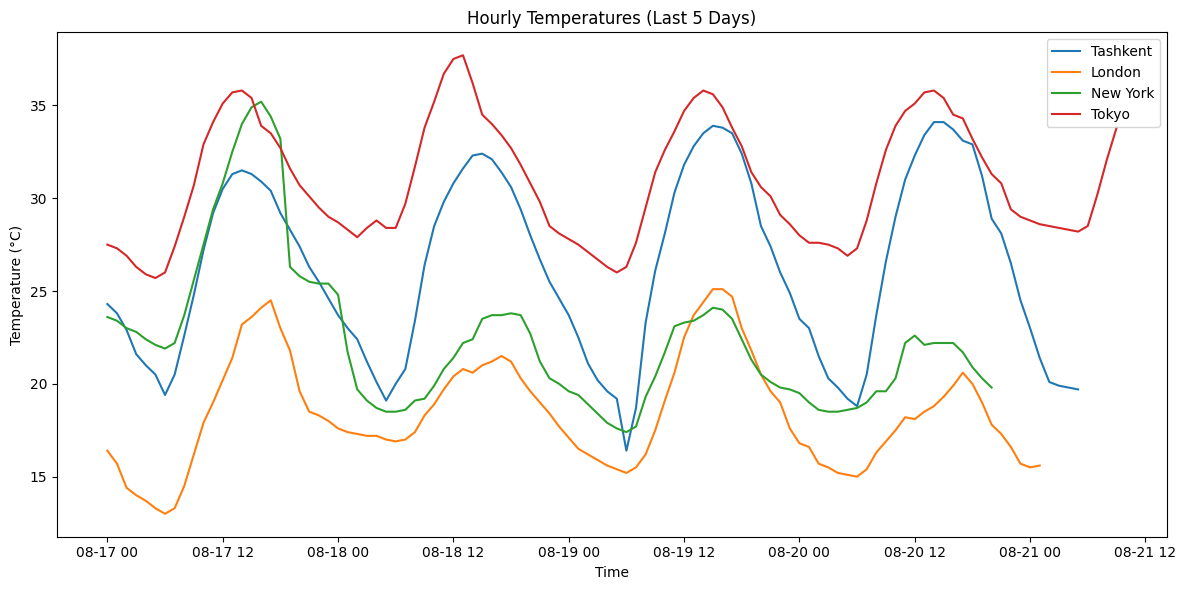

In [32]:
fig = plt.figure(figsize = (12, 6))

for city in aldf['city'].unique():
  subset = aldf[aldf['city'] == city]

  plt.plot(subset['time'], subset['temperature_2m'], label = city)

plt.title("Hourly Temperatures (Last 5 Days)")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()



---



### Curency

In [38]:
url = 'https://cbu.uz/uz/arkhiv-kursov-valyut/json'
responce = requests.get(url)

data = responce.json()
df_cur = pd.DataFrame(data).set_index('id')
df_cur

,Code,Ccy,CcyNm_RU,CcyNm_UZ,CcyNm_UZC,CcyNm_EN,Nominal,Rate,Diff,Date
id,,,,,,,,,,
69,840,USD,Доллар США,AQSH dollari,АҚШ доллари,US Dollar,1,12413.79,-52.65,22.08.2025
21,978,EUR,Евро,EVRO,EВРО,Euro,1,14468.27,-48.9,22.08.2025
57,643,RUB,Российский рубль,Rossiya rubli,Россия рубли,Russian Ruble,1,154.86,-0.56,22.08.2025
22,826,GBP,Фунт стерлингов,Angliya funt sterlingi,Англия фунт стерлинги,Pound Sterling,1,16728.82,-102.12,22.08.2025
33,392,JPY,Иена,Yaponiya iyenasi,Япония иенаси,Japan Yen,1,84.06,-0.47,22.08.2025
...,...,...,...,...,...,...,...,...,...,...
71,928,VES,Венесуэльский боливар,Venesuela bolivari,Венесуэла боливари,Bolívar,1,89.16,-1.21,22.08.2025
72,704,VND,Донг,Vetnam dongi,Вьетнам донги,Dong,10,4.70,-0.02,22.08.2025
73,960,XDR,СДР,SDR,СДР,SDR,1,16969.02,-91.3,22.08.2025


In [43]:
from datetime import datetime, timedelta

# todays date
endd = datetime.today()

# 3 month ago
startd = endd - timedelta(days = 90)

# collecting data
alldata = []

for n in range((endd - startd).days + 1):
  d = (startd + timedelta(days = n)).strftime('%Y-%m-%d')
  url = f"https://cbu.uz/uz/arkhiv-kursov-valyut/json/all/{d}/"
  r = requests.get(url)
  if r.status_code == 200:
    day_data = r.json()
    alldata.extend(day_data)   # list of dictionaries

# creating data frames
df = pd.DataFrame(alldata)

# delete unecessery columns
df = df[['Ccy', 'CcyNm_UZ', 'Rate', 'Date']]
df['Rate'] = pd.to_numeric(df['Rate'], errors = 'coerce')

df.head(9)

,Ccy,CcyNm_UZ,Rate,Date
0,USD,AQSH dollari,12904.51,23.05.2025
1,EUR,EVRO,14575.64,23.05.2025
2,RUB,Rossiya rubli,161.99,23.05.2025
3,GBP,Angliya funt sterlingi,17295.91,23.05.2025
4,JPY,Yaponiya iyenasi,89.94,23.05.2025
5,AZN,Ozarbayjon manati,7590.89,23.05.2025
6,BDT,Bangladesh takasi,105.95,23.05.2025
7,BGN,Bolgariya levi,7451.50,23.05.2025
8,BHD,Bahrayn dinori,34229.47,23.05.2025


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ccy       6825 non-null   object 
 1   CcyNm_UZ  6825 non-null   object 
 2   Rate      6825 non-null   float64
 3   Date      6825 non-null   object 
dtypes: float64(1), object(3)
memory usage: 213.4+ KB


In [45]:
df.describe()

,Rate
count,6825.000000
mean,4323.812256
std,7950.466777
min,0.140000
25%,87.920000
50%,712.400000
75%,3837.180000
max,42218.370000


In [70]:
df_sel = df[df['Ccy'].isin(['USD', 'EUR'])]
df_sel

,Ccy,CcyNm_UZ,Rate,Date
0,USD,AQSH dollari,12904.51,23.05.2025
1,EUR,EVRO,14575.64,23.05.2025
75,USD,AQSH dollari,12904.51,23.05.2025
76,EUR,EVRO,14575.64,23.05.2025
150,USD,AQSH dollari,12915.90,26.05.2025
...,...,...,...,...
6601,EUR,EVRO,14630.36,20.08.2025
6675,USD,AQSH dollari,12466.44,21.08.2025
6676,EUR,EVRO,14517.17,21.08.2025
6750,USD,AQSH dollari,12413.79,22.08.2025


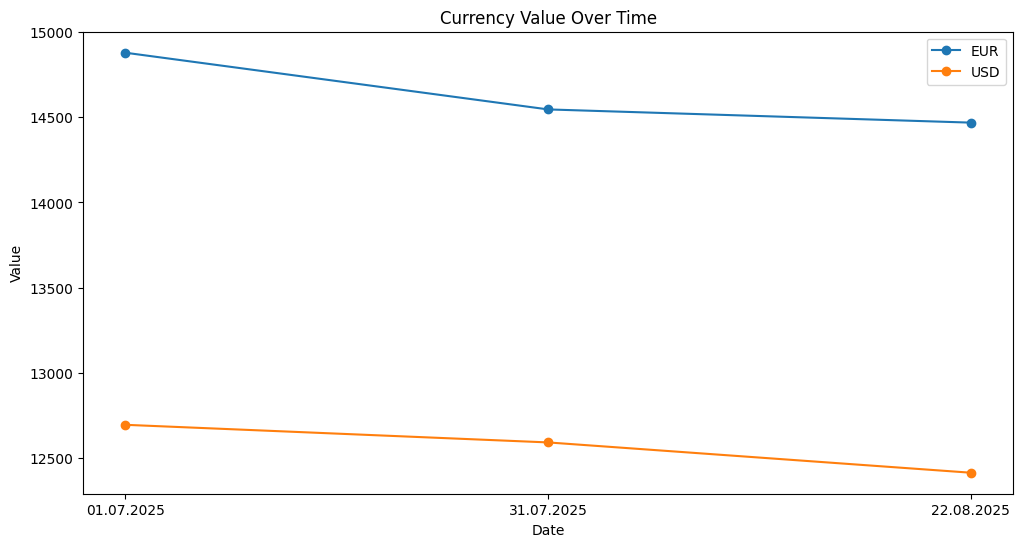

In [99]:
fig, ax = plt.subplots(figsize = (12, 6))
a = df_sel[(df_sel['Date'] == '22.08.2025') | (df_sel['Date'] ==  '31.07.2025') | (df_sel['Date'] ==  '01.07.2025')]
cur = a['Ccy'].unique()

for cur, d in a.groupby("Ccy"):
    ax.plot(d["Date"], d["Rate"], marker="o", label=cur)



ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set_title("Currency Value Over Time")
ax.legend()
plt.show()